<a href="https://colab.research.google.com/github/kanav9063/Deep-Learning/blob/main/LinReg_and_Logistic_Regression_Drive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This homework contains two sections. In the first section, you will implement a simple linear regression model. In the second section, you will implement a simple logistic regression model.

In [10]:
import random
import numpy as np
import matplotlib.pyplot as plt

def reset_seed(seed):
    random.seed(seed)
    np.random.seed(seed)

## Tips for Implementation

If you are familiar with NumPy, you can skip reading this section.

The implementation of linear regression and logistic regression is based on Python and Numpy. Numpy use `np.ndarray` to represent vectors and matrices. However, if you are not familiar with Numpy, the shape issues might be quite often during your implementation. Therefore, we provide the following tips:

1. Print the shapes when you are not sure or a bug happens. Given a `np.ndarray` object, you can always get its shape using `.shape` attribute.

```py
data = np.array([1,2,3])
print(data.shape)
```
Output:
```
>>> (3,)
```

```py
data = np.array([[1,2,3]])
print(data.shape)
```
Output:
```
>>> (1, 3)
```


2. Representing row/column vectors.

(Note: this is just one way to manage the shape of vector/matrices. You do not have to follow this if you are already familiar with NumPy).

In numpy, the shape (n,) is different from the shape (n, 1), although two arrays with shape (n,) and (n, 1) have the same number of elements. We recommend creating row/column vectors with the shape (n, 1) and (1, n), which could help you better manage the matrix/vector multiplication. For example, to create a row vector, you may use the following code:

```py
# shape (3,)
row_vector = np.array([1,2,3])
# -1 means numpy will infer the specific value for that axis
row_vector = row_vector.reshape(1, -1)

print(row_vector.shape)
```
The shape will be (1, 3)

This will be useful when you represent the features of your input data, the target labels, and the model parameters. For example, assume you have $5$ data points, each with dimension $10$. Then they can be represented as a 2D array:

```py
data = np.random.rand(5, 10)
```

Their corresponding labels, assuming each of them is a real number, can be represented as an array with shape (5,) or (5, 1):
```py
# shape (5,)
labels = np.random.rand(5)
shape (5,1)
labels = labels.reshape(5, 1)
```


3. Vector/matrix multiplicatin.

If you represent vectors using the above way (always add an extra empty axis), you should be careful about the vector/matrix multiplicatin.

```py
# shape (3,)
vector_c = np.array([1,2,3])
# add an extra axis. Now the shape is (1, 3)
vector_c = vector_c.reshape(1, 3)
# a matrix with shape [3, 2]
matrix_W = np.random.rand(3, 2)
# multiply c with W
res = np.matmul(vector_c, matrix_W)
print(res.shape)
```
The output shape will be [1, 2]. It is still a 2D array, not a vector with shape (2, )

Similarly, if you multiple a row vector with a column vector, both of which have an extra empty axis:

```py
# shape (3,)
vector_c = np.array([1,2,3])
# -1 means numpy will infer the specific value for that axis
vector_c = vector_c.reshape(1, 3)

# shape (3,)
vector_a = np.array([1,2,3])
# -1 means numpy will infer the specific value for that axis
vector_a = vector_c.reshape(3, 1)

res = np.matmul(vector_c, vector_a)
print(res.shape)
```
The shape will be **(1,1)**. It is NOT an integer anymore. To make it an integer, you will need to additionally process the result:

```py
res = res[0][0]
```

## Task 1: Linear Regression

**Task 1.1: Data Preparation**

Write a Python function named `generate_data` that takes the following parameters:

1.   `num_examples`: representing the number of data points to generate.
2.   `input_dim`: representing the dimensionality of data points to generate (without the bias dimension)

Inside the function:

1.   Specify the linear coefficient w and bias term (generate them randomly).
2.   Generate `num_examples` random values with dimension `input_dim`.
3.   Calculate the corresponding target variable `y`.
4.   (**opition**) Add random noise to `y` using a normal distribution with mean 0 and a pre-specified standard deviation.

Return:

1.   `data`: a 2D array of shape (num_examples, input_dim + 1), with the first column being filled with 1s. This additional column is included to incorporate the bias term (b) in the regression task $𝑦=𝑊𝑥+𝑏$ as part of the weights
$W$, eliminating the need for a separate bias term. See Page 20 in the CS165B Review slides.
2.   `y`: the target variable.

In [11]:
def generate_data(num_example, input_dim):
    """
    Generates a dataset for linear regression.

    Args:
        num_example (int): The number of data points to generate.
        input_dim (int): The dimensionality of each data point (excluding the target).

    Returns:
        data (np.ndarray): A numpy array of shape (num_example, input_dim + 1) containing the generated data.
                           The first column is filled with 1.
        gt_y (np.ndarray): A numpy array of shape (num_example,) representing the ground truth target values.
    """
    data, gt_y = None, None
    ###########################################
    ## TODO: Generate random data points and ##
    ## corresponding ground truth y values   ##
    ###########################################

    w = np.random.rand(input_dim + 1, 1)  # weights including

    X = np.random.rand(num_example, input_dim) #data matrix

    # column of 1s to add the bias term
    data = np.concatenate((np.ones((num_example, 1)), X), axis=1)

    gt_y = np.matmul(data, w) #y=Xw

    gt_y=gt_y.reshape(-1)

    ###########################################
    ############ End of your code #############
    ###########################################

    return data, gt_y

**Task 1.2: Data Visualization**

Generate synthetic data using your `generate_data` function.
Create scatter plots to visualize the generated data points by setting input_dim to 1.


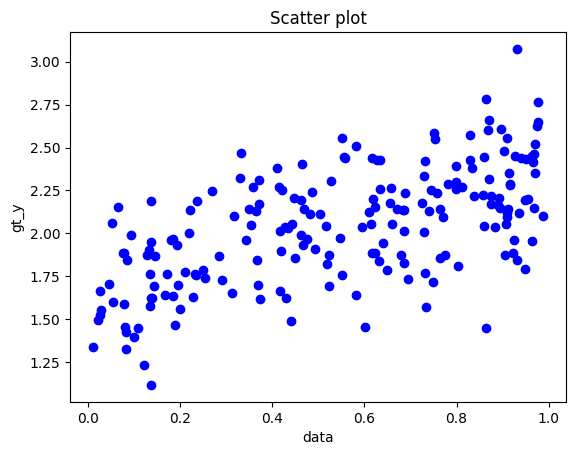

In [12]:
num_example = 200
input_dim = 10
reset_seed(1)

data, gt_y = generate_data(num_example, input_dim)

plt.scatter(data[:,1], gt_y, label='Data Points', color='blue', marker='o')
plt.xlabel('data')
plt.ylabel('gt_y')
plt.title('Scatter plot')
plt.show()

**Task 1.3: Data Splitting for Model Training**

Split the created dataset into a training set and a validation set. Please use the variable `train_perc` to control the proportion of data used for training. Splitting data into separate sets is crucial for evaluating machine learning models.

Inside the function:

1.   Calculate the number of samples to include in the training set and the validation set based on the `train_perc` parameter, which is a floating-point number between 0 and 1, indicating the proportion of data to be used for training. For example, if `train_perc` = 0.8, 80% of the data will be used for training, and the remaining 20% will be used for validation.

2.   Randomly shuffle the data to ensure that it's not sorted in any particular order.

3.   Split the data into training and validation sets according to the specified proportions.


In [13]:
# train test split
def train_test_split(data, gt_y, train_perc):
    """Split the dataset into training and validation set."""
    assert(train_perc > 0. and train_perc <= 1.)
    data_train, y_train, data_test, y_test = None, None, None, None

    ##################################################
    ## TODO: split data and gt_y into train and val ##
    ##################################################

    # Training samples and validation
    total = data.shape[0]
    train = int(total * train_perc)
    val = total - train

    # Shuffle the data using np.random.permutation()
    shuffled_indices = np.random.permutation(total)
    shuffled_data = data[shuffled_indices]
    shuffled_gt_y = gt_y[shuffled_indices]

    # Split into training and validation sets
    data_train = shuffled_data[:train]
    data_test = shuffled_data[train:]

    y_train = shuffled_gt_y[:train]
    y_test = shuffled_gt_y[train:]

    ##################################################
    ################ End of your code ################
    ##################################################

    return data_train, y_train, data_test, y_test

reset_seed(1)
train_perc = 0.3
data_train, y_train, data_test, y_test = train_test_split(data, gt_y, train_perc)
print(data_train.shape)

(60, 11)


**Task 1.4: Model Training - Analytically**

You need to implement a simple linear regression function to obtian optimal weight and bias using the analytical solution method. This method allows you to calculate the coefficients of the linear regression model directly without iterative optimization algorithms.

In [14]:
def lin_reg_analyt(X, y):
    """
    Train linear regression analytical.
    Optimial solution:
    (X^T * X)^{-1} * X^T * y
    """
    W_optim = None
    ##########################################
    ## TODO: Calculate the optimal solution ##
    ##########################################

    # w* = (X^T * X)^{-1} * X^T * y
    W_optim = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y)

    ##########################################
    ########### End of your code #############
    ##########################################
    return W_optim

**Task 1.5: Train Your Model**

Now, you already have all the helper functions to train your linear regression model. Obtain the predicted parameters.

In [29]:
parameters = lin_reg_analyt(data_train, y_train)
print(parameters)

[0.13645523 0.05991769 0.12134346 0.04455188 0.10749413 0.22570934
 0.71298898 0.55971698 0.01255598 0.07197428 0.96727633]


**Task 1.6: Model Evaluation**
Make predictions on the validation data using your trained model.  Calculate and display the Mean Squared Error (MSE) score to evaluate the model's performance.


In [16]:
y_test_pred = None
##################################################
## TODO: Make predictions on the validation set ##
##################################################

y_test_pred = np.matmul(data_test, parameters)
##################################################
################ End of your code ################
##################################################

# Calculate MSE error
mse = np.mean((y_test - y_test_pred) ** 2)
print(f"MSE on validation set: {mse}")

MSE on validation set: 5.74727429859144e-29


**Remark**

By now, you have finished the basic version of linear regression. With no additive noise in your data generation function, the MSE you achieve by using the analytical solution should be almost zero.

**Task 1.7: Basic Gradient Descent [30 points]**

Now, instead of using the analytic method to find the best parameters for the linear regression problem, you need to implement a gradient descent (GD) approach. Initialize your parameters with all zeros, set the number of iterations to 1000, and the learning rate to 1e-3. Report the MSE score and compare it to the one you found using the analytical approach.

**Note: Be careful about the shape when creating the parameter.** If you are not familar with NumPy, go back to the "Tips for Implementation" section and read point 2 and 3. Are you creating your parameters as an array with shape (input_dim, ) or (input_dim, 1)? Different choices will lead to different implementations of the gradient computation, which includes multiplications between matrices and vectors.



In [28]:
def gd_linear_regression(X, y, num_step, lr):
    """Use gradient descent to find the optimal parameters"""
    # initialize parameters
    parameters = np.zeros((X.shape[1], 1))
    #############################################
    ## TODO: Use GD to find optimal parameters ##
    #############################################
    y = y.reshape(-1, 1)

    for i in range(num_step):
        # Gradient: 2 * (X^T * (X * w - y))
        grad = 2 * np.matmul(X.T, (np.matmul(X, parameters) - y))

        parameters = parameters - lr * grad
    #############################################
    ############# End of your code ##############
    #############################################
    return parameters

num_step = 1000
lr = 1e-3
parameters_gd = gd_linear_regression(data_train, y_train, num_step, lr)
print(parameters_gd)

[[0.13697055]
 [0.05978951]
 [0.12124673]
 [0.04450736]
 [0.10736029]
 [0.22561112]
 [0.71292267]
 [0.5595681 ]
 [0.01247357]
 [0.07189447]
 [0.96716828]]


Now evaluate the parameters you get by gradient descent on the validation set.

In [30]:
y_test_pred = None
##################################################
## TODO: Make predictions on the validation set ##
##################################################
y_test_pred = np.matmul(data_test, parameters_gd)
##################################################
################ End of your code ################
##################################################

# Calculate MSE error
mse = np.mean((y_test - y_test_pred) ** 2)
print(f"MSE on validation set: {mse}")

MSE on validation set: 0.29741855430386743


**Task 1.8: Linear Regression with L2 Regularization**

 Recall the objective function for linear regression can be expressed as $E(\mathbf{w})=\frac{1}{N}\|\mathbf{X}\mathbf{w}-\mathbf{y}\|^2$. Minimizing this function with respect to $\mathbf{w}$ leads to the optimal $\mathbf{w}^*$ as $(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$.  However, this solution holds only when $\mathbf{X}^T\mathbf{X}$ is nonsingular.

To overcome this problem, the following objective
function is commonly minimized instead:
$E_2(\mathbf{w})=\|\mathbf{X}\mathbf{w}-\mathbf{y}\|^2+\alpha\|\mathbf{w}\|^2,$ where $\alpha>0$ is a user-specified parameter.  This objective function is often called ridge regression.  

Now, you need to repeat what you have done to obtain the optimal parameters of the ridge regression model using **both analytical** and **gradient descent** approaches.

Compare the MSE on the validation set for parameters obtained by four method: linear regression with analytical and gradient descent solution, and ridge regression with analytical and gradient descent solution (feel free to explore different values for $\alpha$).

Report your results in the following setting and discuss your findings:

*   Generate 1000 random data points with input dimension 100 (not including bias). Fix 100 of them as test points. Among the remaining 900 data points, use different number of data points (25, 50, 75, 100, ..., 300) as training data. Report MSE on the test set and plot the MSE as a function of the number of training data.



In [31]:
def ridge_regression_analyt(X, y, alpha):
    """Train ridge regression analytically."""
    W_optim = None
    ##########################################
    ## TODO: Calculate the optimal solution ##
    ##########################################

    I = np.eye(X.shape[1])

    W_optim = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X) + 2 * alpha * I), X.T), y)

    ##########################################
    ############ End of your code ############
    ##########################################
    return W_optim

In [32]:
# Modify the following code to create data and call the ridge regression solver defined above.
data, gt_y = generate_data(num_example, input_dim)
train_perc = 0.9
data_train, y_train, data_test, y_test = train_test_split(data, gt_y, train_perc)


alpha = 0.15
W_optim = ridge_regression_analyt(data_train, y_train, alpha)

y_test_pred = np.matmul(data_test, W_optim)
# Calculate MSE error
mse = np.mean((y_test - y_test_pred) ** 2)
print(f"MSE on test set: {mse}")

MSE on test set: 9.507908891986251e-05


In [33]:
def gd_ridge_regression(X, y, alpha, num_step, lr):
    """Use gradient descent to find the optimal parameters"""
    # initialize parameters
    parameters = np.zeros((X.shape[1], 1))
    #############################################
    ## TODO: Use GD to find optimal parameters ##
    #############################################

    y = y.reshape(-1, 1)

    for i in range(num_step):
        # Gradient: 2 * (X.T @ (X @ w - y)) + 2 * alpha * w
        grad = 2 * (np.matmul(X.T, np.matmul(X, parameters) - y)) + 2 * alpha * parameters

        parameters -= lr * grad

        parameters = parameters - lr * grad
    #############################################
    ########### End of your code ################
    #############################################

    return parameters

In [34]:
# Modify the following code to create data and perform gradient descent to solve the ridge regression problem.
alpha = 0.05

num_step = 100000
lr = 1e-6


W_optim = gd_ridge_regression(data_train, y_train, alpha, num_step, lr)

y_test_pred = np.matmul(data_test, W_optim)
# Calculate MSE error
mse = np.mean((y_test - y_test_pred) ** 2)
print(f"MSE on test set: {mse}")

MSE on test set: 0.7020536430271304


## Task 2: Logistic regression with Python

In this machine problem (MP), you will implement a simple logistic regression model in Python. You will load MNIST dataset and visualize the results using Matplotlib.

In [23]:
import math
import torch
import random
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
plt.rcParams["savefig.bbox"] = 'tight'
%matplotlib inline


def reset_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

reset_seed(42)

**Task 2.1: Download MNIST dataset**

Write a Python function named `download_mnist` that downloads MNIST dataset using `torchvision.datasets`. You can refer to the document [here](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html?highlight=mnist#torchvision.datasets.MNIST).

Inside the function:
1. Download MNIST dataset using `torchvision.datasets`.

Return:
1. `train_dataset_`: a dataset object that contain raw MNIST images and the labels in train set.
2. `test_dataset_`: a dataset object that contain raw MNIST images and the labels in test set.

In [24]:
def download_mnist():
    # Load the MNIST test dataset
    train_dataset_ = datasets.MNIST(
        root='./data',
        train=True,
        download=True
    )

    # Load the MNIST test dataset
    test_dataset_ = datasets.MNIST(
        root='./data',
        train=False,
        download=True
    )

    return train_dataset_, test_dataset_

train_dataset_, test_dataset_ = download_mnist()
print(f"First data point in the training set: {train_dataset_[0]}")
# Convert image to numpy array
img = np.array(train_dataset_[0][0]).astype(np.float32)
print(f"Image shape: {img.shape}")
print(f"Pixel value range: {img.min()} - {img.max()}")

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 38250482.09it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1125859.19it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9324793.20it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7791627.31it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

First data point in the training set: (<PIL.Image.Image image mode=L size=28x28 at 0x7BE4A421F280>, 5)
Image shape: (28, 28)
Pixel value range: 0.0 - 255.0


To help you undertsand what is contained in the dataset object, we provide you a visualization function to plot the images. You can run the code below to better understand MNIST dataset.

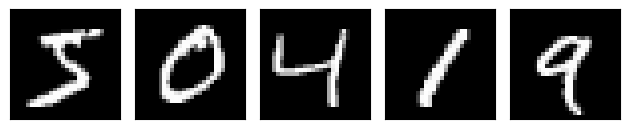

In [25]:
def plot(imgs, row_title=None):
    # This helper function is modified based on https://pytorch.org/vision/main/auto_examples/transforms/plot_transforms_illustrations.html
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0])
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), cmap='gray')
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

plot([train_dataset_[i][0] for i in range(5)])

**Task 2.2: Preprocess MNIST Dataset**

Write the preprocess function for MNIST dataset. You need to:
1. Write a helper function `normalize_image` that converts an image object into numpy array and then normalize it. To normalize an image, you need to convert the value into the range [0, 1], substract the mean of pixel value, and divide by the standard deviation of pixel value.
2. Write a helper function `transform_mnist` that traverse through the raw dataset, normalize the image (using `normalize_image`), and stack all images into an array.


**Note: the following code requires processing the target labels into shape (num_examples, 1) instead of (num_examples, )**. This will affect the shape of the computed gradient. If you are unfamiliar with NumPy, you may read the "Tips for Implementation" section for reference.

In [26]:
def normalize_image(image, mean=0.1307, std=0.3081):
    """
    This function normalizes the input Grayscale image into a numpy array.

    Return:
    normalized_image: array of shape (1, height, width), the pixel value is first
    converted to [0, 1] and then normalized with specified mean and std.
    """
    normalized_image = None

    ######################################
    ## TODO: Normalize input image with ##
    ##      specified mean and std      ##
    ######################################

    ######################################
    ############ End of your code ########
    ######################################

    return normalized_image


def transform_mnist(dataset):
    """
    This function transforms all images and stacks them in an array.

    Return:
    features: numpy array of shape (N, 1, height, width)
    targets: numpy array of shape (N, 1)
    where N is the number of data points in the dataset
    """
    features = []
    targets = []

    ############################################
    ## TODO: Transform raw dataset into numpy ##
    ## array dataset                          ##
    ############################################

    ###########################################
    ############ End of your code #############
    ###########################################

    return features, targets

In [27]:
train_data = transform_mnist(train_dataset_)
test_data = transform_mnist(test_dataset_)
print(train_data[0].shape) # the shape should be (60000, 1, 28, 28)
print(train_data[1].shape) # the shape should be (60000, 1)

AttributeError: 'list' object has no attribute 'shape'

**Task 2.3: Create a subset of MNIST**

We will start with a binary classification task, i.e., classifying two digits in the dataset. Write a function `create_2class_subset` for MNIST dataset that extracts the data for `pos_class` and `neg_class`, where `pos_class` and `neg_class` are indices of positive and negative classes.

In [ ]:
def create_2class_subset(data, pos_class, neg_class):
    """
    This function extracts the samples of label `pos_class` and `neg_class` from full dataset.
    And change the label for pos_class data points to 1, and neg_class data points to -1.

    Return:
    subdata_features: array of shape (N, 1, height, width)
    subdata_targets: array of shape (N, 1)
    where N is the number of data points with label pos_class and neg_class in the dataset
    NOTICE: subdata_targets only contain 1 and -1.
    """
    subdata_features = None
    subdata_targets = None

    ############################################
    ## TODO: Extract the samples of pos_class ##
    ## and neg_class from full data           ##
    ############################################

    ###########################################
    ############ End of your code #############
    ###########################################

    return (subdata_features, subdata_targets)

In [ ]:
# We will use 1 as positive class and 5 as negative class
pos_class = 1
neg_class = 5
train_features, train_targets = create_2class_subset(train_data, pos_class, neg_class)
test_features, test_targets = create_2class_subset(test_data, pos_class, neg_class)

print(np.unique(test_targets)) # should contain only 1 and -1

**Task 2.4: Data-helper function for training**

In the previous cells, we have implemented basic data loding functions for MNIST classification. However, we still need several helper functions in training. In this task, you need to implement:
1. A function `get_raw_feature` that converts 2d image into 1d array and uses raw pixel values as features, i.e., flatten the image into a feature vector.
2. A function `random_shuffle` that randomly shuffle the training data.

In [ ]:
def raw_feature_func(features):
    raw_features = None
    ############################################
    ## TODO: Reshape the array to obtain      ##
    ## raw feature                            ##
    ############################################

    ###########################################
    ############ End of your code #############
    ###########################################

    return raw_features

def random_shuffle(features, targets):
    shuffled_features = None
    shuffled_targets = None
    ############################################
    ## TODO: shuffle the training dataset     ##
    ############################################

    ###########################################
    ############ End of your code #############
    ###########################################
    return (shuffled_features, shuffled_targets)

In [ ]:
reset_seed(42) #! DO NOT CHANGE THIS SEED

train_features = raw_feature_func(train_features) # (num_example, 784)
test_features = raw_feature_func(test_features) # (num_example, 784)

train_features, train_targets = random_shuffle(train_features, train_targets)

In [ ]:
# test_targets.shape
print(f"Train features shape: {train_features.shape}")
print(f"Train targets shape: {train_targets.shape}")

**Task 2.5: Gradient Descent Training**

Now, we have all data-related functions ready. In this task, you need to implement the Gradient Descent algorithm for 2-class MNIST classification. You need to implement:
1. A function `weight_initialization` that initializes the model parameters using `np.random.randn` function.
2. A function `calc_grad` that calculates the gradient with respect to model's parameters given input features and targets.
3. A function `train_gradient_descent`, that impelements the gradient descent algorithm and visualize the training loss and accuracy across the training steps.
4. A function `visualize_loss_acc`, that visualizes the training loss and accuracy using matplotlib.
5. Evaluate the trained model on the test set and report the test accuracdy.

In [ ]:
def weight_initialization(shape):
    '''
    This function initializes the model's weight.

    Input:
    shape: the shape of the parameter

    Return:
    w: the paramter of the logistic regression model.
    '''
    w = np.array(0)
    ############################################
    ## TODO: initialize the weight using      ##
    ## np.random.randn                        ##
    ############################################

    ###########################################
    ############ End of your code #############
    ###########################################
    return w

def calc_grad(w, features, targets):
    '''
    This function initializes the model's weight.
    Return:
    w: the paramter of the logistic regression model.
    '''
    grad = np.array(0)
    ############################################
    ## TODO: calculate the gradient of w      ##
    ## for the samples (features, targets).   ##
    ############################################

    ###########################################
    ############ End of your code #############
    ###########################################
    return grad

def visualize_loss_acc(losses, accs):
    '''
    This function plots the loss curve and accuracy curve using matplotlib.
    '''
    # use matplotlib plot train curves
    plt.figure(figsize=(8, 12))

    ############################################
    ## TODO: Plot the train curves            ##
    ############################################

    ###########################################
    ############ End of your code #############
    ###########################################

    # Show the figure.
    plt.show()

def train_gradient_descent(num_epochs, lr, w, train_features, train_targets):
    '''
    This function trains the model w using gradient desent on the dataset (train_features, train_targets).

    Returns:
    w_star: the optimized model parameter w.
    '''
    losses = []
    accs = []

    # Train loop
    for i in range(num_epochs):

        grad = np.zeros_like(w)

        ############################################
        ## TODO: calculate the gradient for w.    ##
        ## And the update w                       ##
        ############################################

        ###########################################
        ############ End of your code #############
        ###########################################

        # record the value of the objective function and acc on training
        loss = 0
        acc = 0
        ############################################
        ## TODO: calculate the objective function ##
        ## and acc                                ##
        ############################################

        ###########################################
        ############ End of your code #############
        ###########################################

        # store values for plotting
        losses.append(loss)
        accs.append(acc)
    w_star = w

    print("Training done")
    visualize_loss_acc(losses, accs)
    return w_star

In [ ]:
# Train loop

reset_seed(42) # NOTICE: DO NOT CHANGE THIS SEED
# GRADIENT DESCENT HYPER-PARAMETERS
num_epochs = 100
lr = 0.1

# weight initialization
###########################################
## TODO: the shape for model weight      ##
###########################################
param_shape = tuple([None]) # Please fill the correct shape

###########################################
############ End of your code #############
###########################################

w = weight_initialization(param_shape)
w_star = train_gradient_descent(num_epochs, lr, w, train_features, train_targets)

**Task 2.6: Report test result**

In [ ]:
# report results on validation / test dataset
test_preds = np.array(0)
###########################################
## TODO: predict on test_dataset         ##
###########################################

###########################################
############ End of your code #############
###########################################

test_acc = np.mean(test_preds == test_targets)
print("GD Test acc: ", test_acc)

**Task 2.7: Stochastic Gradient Descent Training**

In this task, you need to implement a function `train_stochastic_gradient_descent` that implements the Stochastic Gradient Descent algorithm, which draws a batch of samples from the train set and updates weights based on this small subset.

Train the model and report the test accuracy.

In [ ]:
def train_stochastic_gradient_descent(num_epochs, batch_size, lr, w, train_features, train_targets):
    '''
    This function trains the model w using stochastic gradient desent on the dataset (train_features, train_targets).
    Returns:
    w_star: the optimized model parameter w.
    '''

    losses = []
    accs = []

    # Train loop
    for i in range(num_epochs):
        pass
        ###########################################
        ## TODO: Implement SGD                   ##
        ###########################################

        ###########################################
        ############ End of your code #############
        ###########################################

    w_star = w

    print("Training done")
    visualize_loss_acc(losses, accs)
    return w_star

In [ ]:
# STOCHASTIC GRADIENT DESCENT HYPER-PARAMETERS
num_epochs = 10
batch_size = 200
lr = 0.1

# weight initialization
###########################################
## TODO: the shape for model weight      ##
###########################################
param_shape = tuple([None]) # Please fill the correct shape

###########################################
############ End of your code #############
###########################################

w = weight_initialization(param_shape)
w_star = train_stochastic_gradient_descent(num_epochs, batch_size, lr, w, train_features, train_targets)

In [ ]:
# report results on validation / test dataset
test_presd = np.array(0)
###########################################
## TODO: predict on test_dataset         ##
###########################################

###########################################
############ End of your code #############
###########################################

test_acc = np.mean(test_preds == test_targets)
print("SGD Test acc: ", test_acc)